In [155]:
import math
import types
import warnings
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [256]:
class Node:
    def __init__(self, num=0, activation = None):
        self.activation = activation
        self.num = num
def sigmoid(x):
    if(x > 20): return 1
    if(x < -20): return 0
    return 1/(1+math.exp(-1*x))
def derSigmoid(y):
    return y*(1-y)
def reLu(x):
    if x > 0 and x < 1: return x
    if x < 0: return x/1000
    return 1+(x-1)/1000
def deReLu(y):
    if y > 0 and y < 1: return 1
    return 0.001

class Network:
    def __init__(self, N, M, F = sigmoid, DF = derSigmoid):
        self.N = N
        self.M = M
        self.network = dict()
        self.bias = []
        self.nodeNum = N+M
        self.layers = []
        self.layers.append([a for a in range(self.N)])
        self.layers.append([a+self.N for a in range(self.M)])
        self.lr = 0.02
        self.F = F
        self.DF = DF
        print(self.F == sigmoid)
    def print(self):
        print(self.order)
        print(self.network)
    def create(self, layerSizes):
        last = self.layers[-1]
        self.layers.pop()
        for i in range(len(layerSizes)): 
            self.layers.append([a+self.nodeNum for a in range(layerSizes[i])])
            self.nodeNum += layerSizes[i]
        self.layers.append(last)
        for i in range(1, len(self.layers)):
            for b in self.layers[i]:
                for a in self.layers[i-1]:
                    self.network[(a, b)] = random.normalvariate()
        for i in range(self.nodeNum):
            self.bias.append(random.normalvariate(1, 1))
    def calculate(self, inputs):
        values = {}
        for i in range(self.N):
            values[i] = inputs[i]
        for L in range(1, len(self.layers)):
            for i in self.layers[L]:
                s = self.bias[i]+sum([values[a]*self.network[(a, i)] for a in self.layers[L-1]])
                values[i] = self.F(s)
        return values
    def backPropogation(self, values, answer):
        der = {}
        netDer = {}
        biasDer = {}
        for i in range(self.M):
            der[i+self.N] = values[i+self.N]-answer[i]
        for L in range(len(self.layers)-1, 0, -1):
            for a in self.layers[L-1]:
                der[a] = 0.0
            for b in self.layers[L]:
                #D = values[b]*(1-values[b])
                D = self.DF(values[b])
                for a in self.layers[L-1]:
                    netDer[(a, b)] = der[b]*D*values[a]
                    der[a] += der[b]*D*self.network[(a, b)]
                biasDer[b] = der[b]*D
        return (netDer, biasDer)
    def getLoss(self, inputs, outputs):
        L=0.0
        for g in range(len(inputs)):
            values = self.calculate(inputs[g])
            for i in range(self.M):
                d = values[i+self.N]-outputs[g][i]
                L += 0.5*d*d
        return L
    def updateNetwork(self, netDer, biasDer, descent = True):
        mult = 1
        if not descent: mult = -1
        for a in self.network:
            self.network[a] -= self.lr*netDer[a]*mult
        for b in biasDer:
            self.bias[b] -= self.lr*biasDer[b]*mult
    def drawNode(x, y, num, ax):
        text = str(num)
        box = ax.text(x, y, text, ha="center", va="center", fontsize=18)
        circle = Circle((x, y), 0.03, facecolor="skyblue", edgecolor="black", zorder=2)
        ax.add_patch(circle)
    def draw(self):
        fig = plt.figure(figsize=(5, 5))
        ax = fig.add_subplot()
        radius = 0.03

        centers = dict()
        L = len(self.layers)
        g = (1.0-2*L*radius)/(L+1)
        g += 2*radius
        X = g-radius
        for i in range(len(self.layers)):
            print(self.layers[i])
            L = len(self.layers[i])
            gy = (1.0-2*L*radius)/(L+1)
            gy += 2*radius
            Y = gy-radius
            for e in range(len(self.layers[i])-1, -1, -1):
                centers[self.layers[i][e]] = (X, Y)
                Y += gy
            X += g
        for i in range(self.nodeNum):
            Network.drawNode(centers[i][0], centers[i][1], i, ax)
        for i, e in self.network:
            w = self.network[(i, e)]
            X1, Y1 = centers[i]
            X2, Y2 = centers[e]
            color = "blue"
            if w < 0.0:
                color = "red"
            ax.plot([X1, X2], [Y1, Y2], color=color, zorder=1)
        
        
        

In [257]:

def trainGeneration(net, inputs, outputs):
    ders = []
    for g in range(len(inputs)):
        values = net.calculate(inputs[g])
        ders.append(net.backPropogation(values, outputs[g]))
    for g in range(len(inputs)):
        netDer = ders[g][0]
        biasDer = ders[g][1]
        net.updateNetwork(netDer, biasDer)

def trainGeneration2(net, inputs, outputs):
    pass

True
[0, 1]
[3, 4, 5]
[6, 7]
[2]


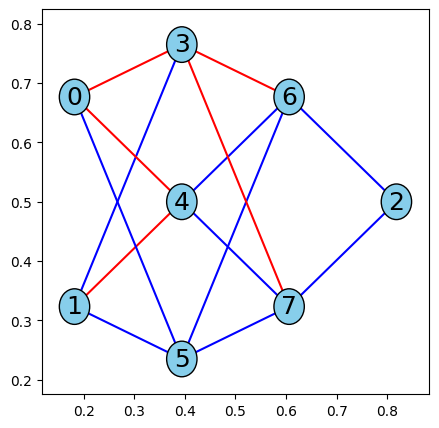

In [258]:
nn = Network(2, 1)
nn.create([3, 2])
nn.draw()

In [259]:
values = nn.calculate([1, 1])
"""
nn.network[(0, 3)] = 10.0
nn.network[(1, 3)] = 10.0
nn.bias[3] = -5
nn.network[(0, 4)] = 10.0
nn.network[(1, 4)] = 10.0
nn.bias[4] = -15
nn.network[(3, 2)] = 10.0
nn.network[(4, 2)] = -20.0
nn.bias[2] = -5
"""


'\nnn.network[(0, 3)] = 10.0\nnn.network[(1, 3)] = 10.0\nnn.bias[3] = -5\nnn.network[(0, 4)] = 10.0\nnn.network[(1, 4)] = 10.0\nnn.bias[4] = -15\nnn.network[(3, 2)] = 10.0\nnn.network[(4, 2)] = -20.0\nnn.bias[2] = -5\n'

In [260]:
inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]
outputs = [[0], [1], [1], [0]]
L = 99
oL = 100
while L/oL < 0.9999 and L > 0.001:
    print("gen")
    oL = L
    L = 1000
    for i in range(10000):
        trainGeneration(nn, inputs, outputs)
        L = min(L, nn.getLoss(inputs, outputs))

gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen


In [261]:
values = [None]*len(inputs)
for e in range(4):
    values[e] = nn.calculate(inputs[e])
    print(values[e])
print(nn.getLoss(inputs, outputs))

{0: 0, 1: 0, 3: 0.974911658861997, 4: 0.14400873905566597, 5: 0.9364949296173242, 6: 0.959103143943873, 7: 0.08743527218659994, 2: 0.02236657515437308}
{0: 0, 1: 1, 3: 0.9998822746798502, 4: 0.8564689384947092, 5: 0.9824725032373477, 6: 0.9466624289076291, 7: 0.8855954794849116, 2: 0.9782780545695698}
{0: 1, 1: 0, 3: 0.11301160603079896, 4: 0.003231021502756188, 5: 0.9823502605579941, 6: 0.9337796370544836, 7: 0.9043165960606508, 2: 0.9824826968801337}
{0: 1, 1: 1, 3: 0.96533530305381, 4: 0.10311637415384939, 5: 0.9952954243007939, 6: 0.9623133373707395, 7: 0.08114867580848575, 2: 0.020885965568499157}
0.0008575930318703077


In [249]:
nn = Network(3, 1)
nn.create([2, 2, 2])
inputs = [[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 0], [0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]]
outputs = [[0], [1], [1], [0], [1], [0], [0], [1]]
L = 99
oL = 100
while L/oL < 0.9999 and L > 0.01:
    print("gen", L)
    oL = L
    L = 1000
    for i in range(10000):
        trainGeneration(nn, inputs, outputs)
        L = min(L, nn.getLoss(inputs, outputs))

True
gen 99
gen 0.9996594245973576
gen 0.9992415107333754
gen 0.9982596909921513
gen 0.9940362103602303
gen 0.9428661347480419
gen 0.8727288148041331
gen 0.8631159350901956
gen 0.8603566458707621
gen 0.8589920083351218
gen 0.8576914914325724
gen 0.7000377106530091
gen 0.3822104753417098
gen 0.013931787464367696


In [250]:
values = [None]*len(inputs)
for e in range(8):
    values[e] = nn.calculate(inputs[e])
    print(values[e][3])
print(nn.getLoss(inputs, outputs))

0.03425164549492117
0.9651192182095116
0.9650818913679288
0.04171226299063958
0.9457406712835817
0.034763833729155855
0.03476036286073068
0.9743483970071626
0.0056839589011416815


In [84]:
for i in range(10000):
    nn.trainGeneration(inputs, outputs)
values = [None]*len(inputs)
for e in range(8):
    values[e] = nn.calculate(inputs[e])
    print(values[e][3])
print(nn.getLoss(inputs, outputs))

0.501461532325917
0.49882831813777057
0.500928201911681
0.49817667469164045
0.5016350240484031
0.4994026386422936
0.5009481020032994
0.49860942282461146
1.0000007692381496


In [247]:
nn = Network(3, 1, reLu, deReLu)
nn.create([5, 3, 2, 2])
inputs = [[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 0], [0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]]
outputs = [[0], [1], [1], [0], [1], [0], [0], [1]]
L = 99
oL = 100
while L/oL < 0.9999 and L > 0.01:
    print("gen", L)
    oL = L
    L = 1000
    for i in range(10000):
        trainGeneration(nn, inputs, outputs)
        L = min(L, nn.getLoss(inputs, outputs))

False
gen 99
gen 0.8571423759717779


In [248]:
values = [None]*len(inputs)
for e in range(8):
    values[e] = nn.calculate(inputs[e])
    print(values[e][3])
print(nn.getLoss(inputs, outputs))

0.4285697635355738
0.42857171116034676
1.000008349427685
0.4285717829500817
0.42857117391574584
0.428571776169743
0.4285717830813447
0.4285717894106009
0.8571423742170599


In [74]:
for i in range(100000):
    nn.trainGeneration(inputs, outputs)
values = [None]*len(inputs)
for e in range(8):
    values[e] = nn.calculate(inputs[e])
    print(values[e][3])
print(nn.getLoss(inputs, outputs))

0.24999993849807745
1.000000099823542
0.25000051258792927
0.2499999217112368
1.00000041626383
-0.0006608795642597042
0.24999979455034202
0.999999991311312
0.3749997476301155


In [230]:
i = -1.0
while i < 2.0:
    print(i, reLu(i), deReLu(i))
    i += 0.2
    

-1.0 -0.001 0.001
-0.8 -0.0008 0.001
-0.6000000000000001 -0.0006000000000000001 0.001
-0.4000000000000001 -0.0004000000000000001 0.001
-0.20000000000000007 -0.00020000000000000006 0.001
-5.551115123125783e-17 -5.551115123125783e-20 0.001
0.19999999999999996 0.19999999999999996 1
0.39999999999999997 0.39999999999999997 1
0.6 0.6 1
0.8 0.8 1
1.0 1.0 0.001
1.2 1.0002 0.001
1.4 1.0004 0.001
1.5999999999999999 1.0006 0.001
1.7999999999999998 1.0008 0.001
1.9999999999999998 1.001 0.001
